In [34]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

wl = np.linspace(380, 780, 401)
air = ml.Non_Dispersion(1)
SiO2 = ml.open_material('SiO2_Nanya', 'Material')
NB = ml.open_material('Nb2O5_Nanya', 'Material')
ITO2 = ml.open_material('ITO_Nanya', 'Material')
OC = ml.open_material('OC_Nanya', 'Material')
sodalime_Nanya = ml.open_material('sodalime_Nanya', 'Material')
ITO2_Cauchy = ml.Cauchy([1.3914142, 0.0903928], ITO2.k, ITO2.wl_k)
ITO2_Linear = ml.Chromatic_Dispersion(1.786, -1.153, 550, ITO2.k, ITO2.wl_k)

R_scan = pd.read_csv('./spectrum/Nanya/Bonsai_R_5_B.csv')['SCAN'].values

R_hypo = lambda th: tm.Design(
    [air, SiO2, ITO2, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
).reflectance(wl, 5)

R_hypo_C = lambda th: tm.Design(
    [air, SiO2, ITO2_Cauchy, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
).reflectance(wl, 5)

R_hypo_L = lambda th: tm.Design(
    [air, SiO2, ITO2_Linear, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
).reflectance(wl, 5)

fom = lambda th:sum(abs(R_hypo(th)+th[4]-R_scan/100))

In [ ]:
sol = differential_evolution(fom, [(68,80),(28,32),(38,50),(6,10),(-0.1,0.1)])
print(sol.x)

In [ ]:
sol2 = minimize(fom, sol.x)
print(sol2.x)

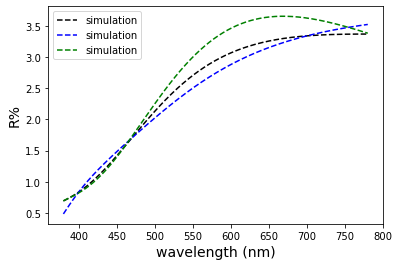

0.10768675858988318
0.20315427729862962


In [38]:
m1 = [70, 28, 39, 5]
m2 = [75, 30, 45, 8]
m3 = [76, 30, 45.3, 7.8]
tk = m1
plt.plot(wl, 100*R_hypo(tk), '--k', label = 'simulation')
plt.plot(wl, 100*R_hypo_C(tk), '--b', label = 'simulation')
plt.plot(wl, 100*R_hypo_L(tk), '--g', label = 'simulation')
#plt.plot(wl, R_scan, '-k', label = 'measurement')
plt.legend(loc = 'best')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
#plt.savefig('Nanya_Bonsai_reflection_blacktap_origin.png')
#print((sum((100*R_hypo(tk)-R_scan)**2)**.5)/301/np.mean(R_scan))
plt.show()
print(np.mean(abs(100*R_hypo(tk)-100*R_hypo_C(tk))))
print(np.mean(abs(100*R_hypo(tk)-100*R_hypo_L(tk))))

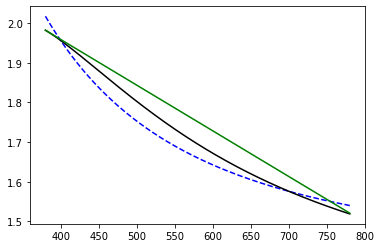

In [33]:
plt.plot(wl, ITO2_Cauchy.nvalues(wl), '--b')
plt.plot(wl, ITO2.nvalues(wl), '-k')
plt.plot(wl, ITO2_Linear.nvalues(wl), '-g')
plt.show()